In [2]:
import pandas as pd
import numpy as np

# Data Visualisation
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv('police.csv')

In [5]:
df.head(10)

,stop_date,stop_time,county_name,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop
0,02-01-2005,01:55,NaN,M,1985.0,20.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
1,18-01-2005,08:15,NaN,M,1965.0,40.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
2,23-01-2005,23:15,NaN,M,1972.0,33.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
3,20-02-2005,17:15,NaN,M,1986.0,19.0,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False
4,14-03-2005,10:00,NaN,F,1984.0,21.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
5,23-03-2005,09:45,NaN,M,1982.0,23.0,Black,Equipment/Inspection Violation,Equipment,False,NaN,Citation,False,0-15 Min,False
6,01-04-2005,17:30,NaN,M,1969.0,36.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
7,06-06-2005,13:20,NaN,F,1986.0,19.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
8,13-07-2005,10:15,NaN,M,1970.0,35.0,Black,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
9,13-07-2005,15:45,NaN,M,1970.0,35.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False


In [6]:
df.describe()

,county_name,driver_age_raw,driver_age
count,0.0,86414.000000,86120.000000
mean,NaN,1970.491228,34.011333
std,NaN,110.914909,12.738564
min,NaN,0.000000,15.000000
25%,NaN,1967.000000,23.000000
50%,NaN,1980.000000,31.000000
75%,NaN,1987.000000,43.000000
max,NaN,8801.000000,99.000000


In [7]:
new_df = df.drop(['county_name','driver_age_raw','violation_raw'], axis = 'columns')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91741 entries, 0 to 91740
Data columns (total 15 columns):
stop_date             91741 non-null object
stop_time             91741 non-null object
county_name           0 non-null float64
driver_gender         86406 non-null object
driver_age_raw        86414 non-null float64
driver_age            86120 non-null float64
driver_race           86408 non-null object
violation_raw         86408 non-null object
violation             86408 non-null object
search_conducted      91741 non-null bool
search_type           3196 non-null object
stop_outcome          86408 non-null object
is_arrested           86408 non-null object
stop_duration         86408 non-null object
drugs_related_stop    91741 non-null bool
dtypes: bool(2), float64(3), object(10)
memory usage: 9.3+ MB


In [6]:
new_df.head(10)

,stop_date,stop_time,driver_gender,driver_age,driver_race,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop
0,02-01-2005,01:55,M,20.0,White,Speeding,False,NaN,Citation,False,0-15 Min,False
1,18-01-2005,08:15,M,40.0,White,Speeding,False,NaN,Citation,False,0-15 Min,False
2,23-01-2005,23:15,M,33.0,White,Speeding,False,NaN,Citation,False,0-15 Min,False
3,20-02-2005,17:15,M,19.0,White,Other,False,NaN,Arrest Driver,True,16-30 Min,False
4,14-03-2005,10:00,F,21.0,White,Speeding,False,NaN,Citation,False,0-15 Min,False
5,23-03-2005,09:45,M,23.0,Black,Equipment,False,NaN,Citation,False,0-15 Min,False
6,01-04-2005,17:30,M,36.0,White,Speeding,False,NaN,Citation,False,0-15 Min,False
7,06-06-2005,13:20,F,19.0,White,Speeding,False,NaN,Citation,False,0-15 Min,False
8,13-07-2005,10:15,M,35.0,Black,Speeding,False,NaN,Citation,False,0-15 Min,False
9,13-07-2005,15:45,M,35.0,White,Speeding,False,NaN,Citation,False,0-15 Min,False


In [7]:
new_df.dropna(axis = 0, how = 'any', thresh = 6,inplace = True)

In [8]:
index = new_df[new_df['driver_age'].isnull()].index

In [9]:
new_df.drop(index,inplace = True)

In [10]:
index = new_df[new_df['driver_gender'].isnull()].index

In [11]:
new_df.drop(index,inplace = True)

In [12]:
new_df.to_csv('cleaned.csv', index = False)

In [13]:
cln_df = pd.read_csv('cleaned.csv')

In [14]:
cln_df.head()

,stop_date,stop_time,driver_gender,driver_age,driver_race,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop
0,02-01-2005,01:55,M,20.0,White,Speeding,False,NaN,Citation,False,0-15 Min,False
1,18-01-2005,08:15,M,40.0,White,Speeding,False,NaN,Citation,False,0-15 Min,False
2,23-01-2005,23:15,M,33.0,White,Speeding,False,NaN,Citation,False,0-15 Min,False
3,20-02-2005,17:15,M,19.0,White,Other,False,NaN,Arrest Driver,True,16-30 Min,False
4,14-03-2005,10:00,F,21.0,White,Speeding,False,NaN,Citation,False,0-15 Min,False


In [15]:
cln_df['stop_date'] = pd.to_datetime(cln_df[('stop_date')])

In [16]:
cln_df = cln_df.sort_values(by = 'stop_date').reset_index(drop = True)

In [17]:
print('\033[1m','Average age of drivers that were stopped is',cln_df['driver_age'].mean(),'.''\033[0m')

 Average age of drivers that were stopped is 34.01186812676367 .


In [36]:
print('\033[1m','Minimum age of the drivers that were stopped is',cln_df['driver_age'].min(),'.','\033[0m')

 Minimum age of the drivers that were stopped is 15.0 . 


In [37]:
print('\033[1m','Maximum age of the drivers that were stopped is',cln_df['driver_age'].max(),'.','\033[0m')

 Maximum age of the drivers that were stopped is 99.0 . 


In [20]:
male = (cln_df['driver_gender'].value_counts()[0]/cln_df['driver_gender'].count())*100
female = (cln_df['driver_gender'].value_counts()[1]/cln_df['driver_gender'].count())*100

In [21]:
print('\033[1m','Total of', cln_df['driver_gender'].value_counts()[0],'males were stopped during traffic stops which is ',round(male,2),'% of total stops.','\033[0m')
print('\033[1m','Total of', cln_df['driver_gender'].value_counts()[1],'females were stopped during traffic stops which is ',round(female,2),'% of total stops.','\033[0m')

 Total of 62649 males were stopped during traffic stops which is  72.75 % of total stops. 
 Total of 23464 females were stopped during traffic stops which is  27.25 % of total stops. 


In [22]:
cln_df['month_year'] = cln_df['stop_date'].apply(lambda x: x.strftime('%Y-%m'))

In [23]:
df_trend = pd.DataFrame(cln_df.groupby('month_year').count().reset_index())

 Below is a graph that shows month-wise distribution of traffic stops along the years from 2005-01 to 2015-12 . 


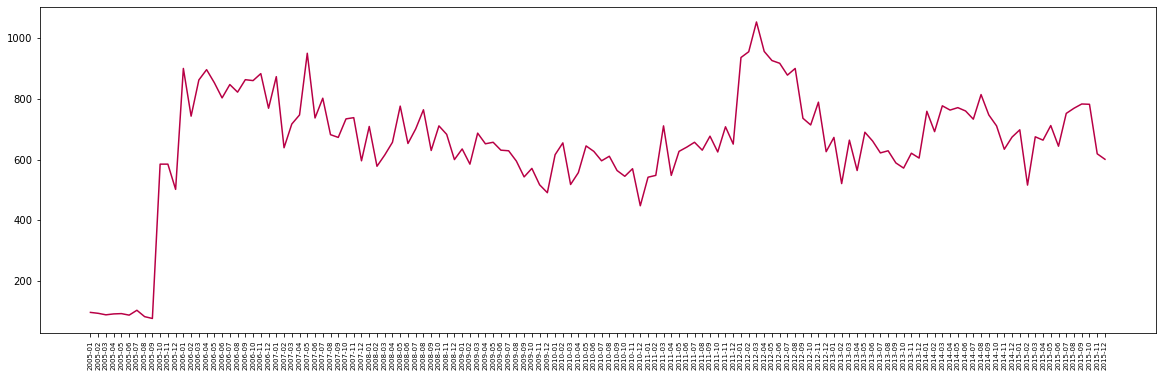

In [24]:
plt.figure(figsize=(20,6))
plt.plot(df_trend['month_year'],df_trend['driver_age'], color='#b80045')
plt.xticks(rotation='vertical', size=7)
print('\033[1m','Below is a graph that shows month-wise distribution of traffic stops along the years from',cln_df['month_year'].min(),"to",cln_df['month_year'].max(),'.','\033[0m')
plt.show()

 Below is the bar graph which shows the race-wise distribution of traffic stops that happened from 2005-01 to 2015-12 . 


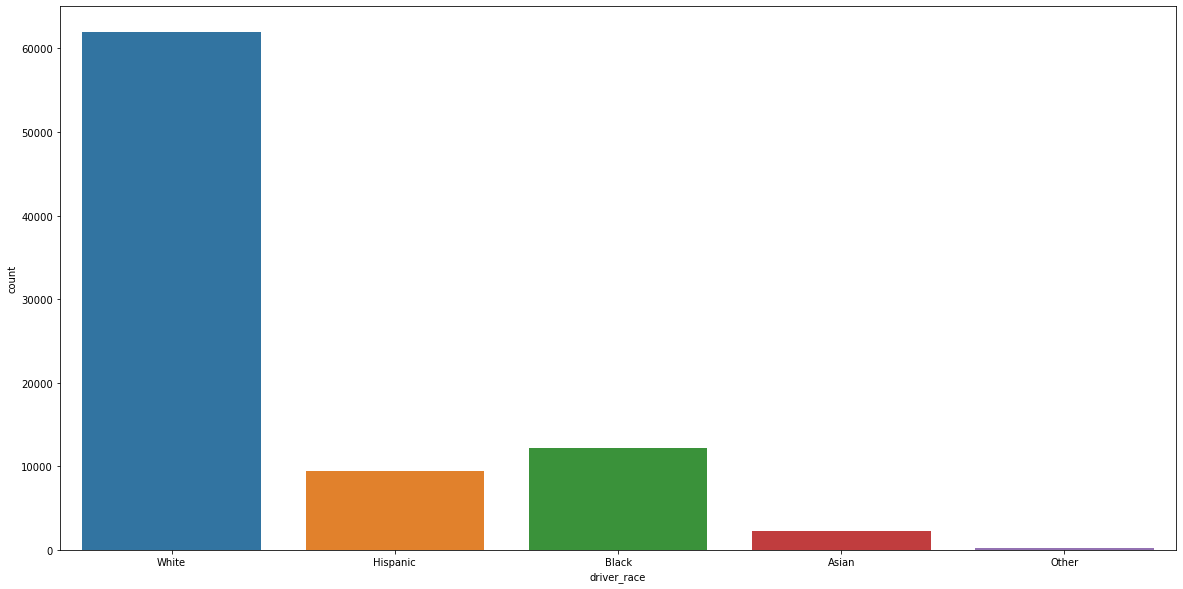

In [25]:
# Setting figure size
plt.figure(figsize=(20,10))

# Plotting shipmode
sns.countplot(cln_df['driver_race'])
print('\033[1m','Below is the bar graph which shows the race-wise distribution of traffic stops that happened from',cln_df['month_year'].min(),"to",cln_df['month_year'].max(),'.','\033[0m')
plt.show()

 Below is the bar graph which shows for what violation does the traffic stop happend. 


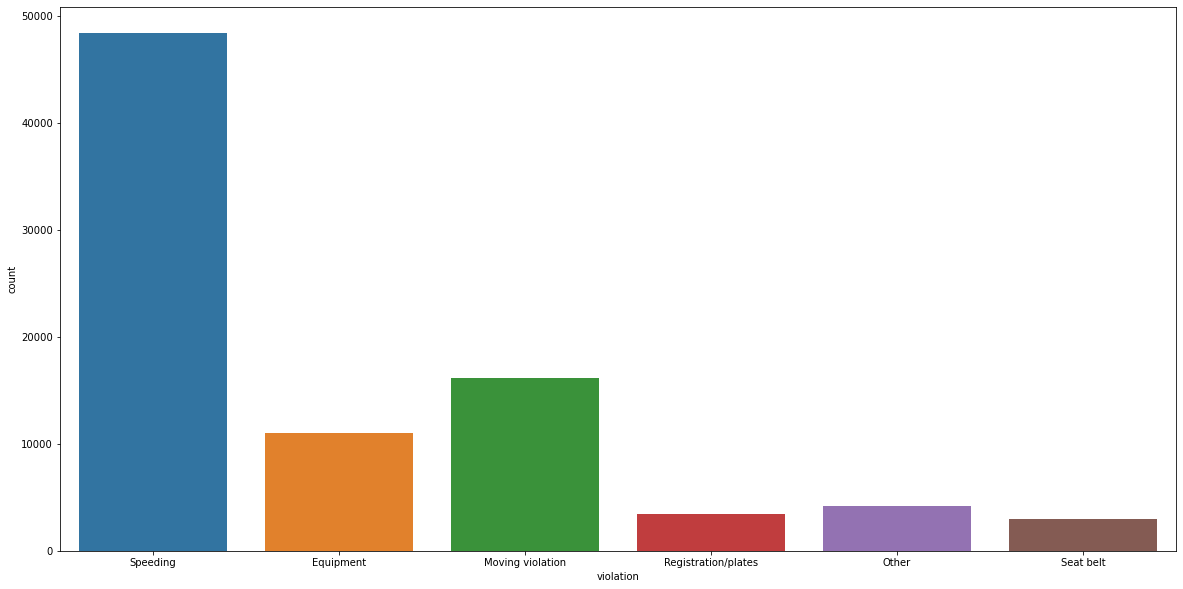

In [26]:
# Setting figure size
plt.figure(figsize=(20,10))

# Plotting shipmode
sns.countplot(cln_df['violation'])
print('\033[1m','Below is the bar graph which shows for what violation does the traffic stop happend.','\033[0m')
plt.show()

In [27]:
print('\033[1m','In total',len(cln_df[cln_df['search_conducted']]),'cases search was conducted which is', round(((len(cln_df[cln_df['search_conducted']])/len(cln_df))*100),2),"% of total stops.",'\033[0m')

 In total 3193 cases search was conducted which is 3.71 % of total stops. 


 Below is the bar graph which shows outcome of the traffic stop happend. 


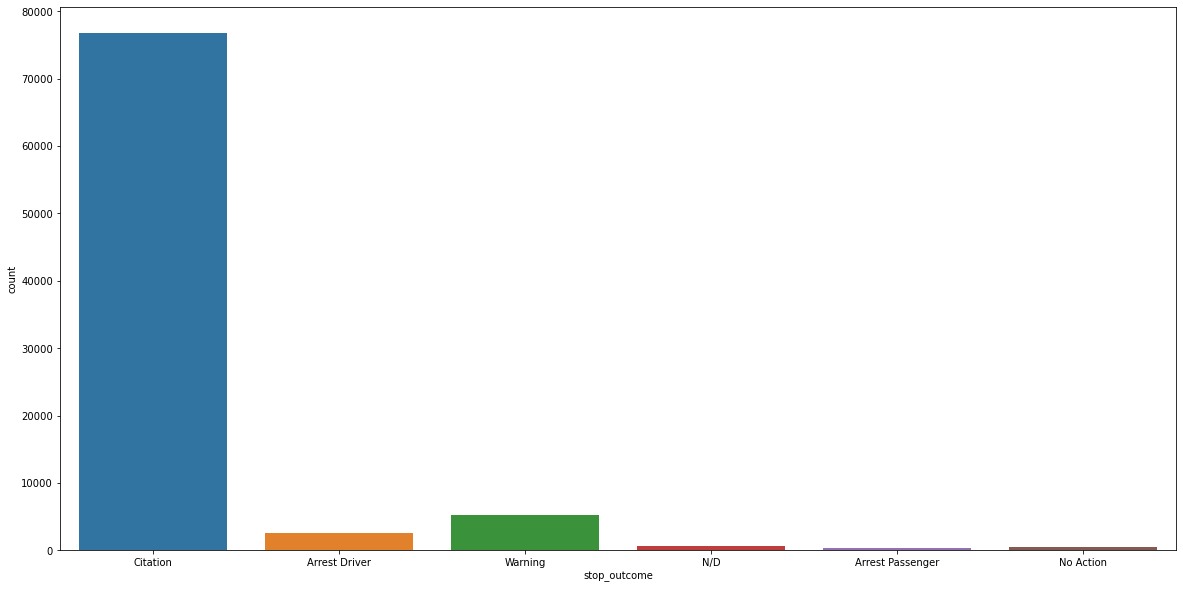

In [28]:
# Setting figure size
plt.figure(figsize=(20,10))

# Plotting shipmode
sns.countplot(cln_df['stop_outcome'])
print('\033[1m','Below is the bar graph which shows outcome of the traffic stop happend.','\033[0m')
plt.show()

In [29]:
print('\033[1m','In total',len(cln_df[cln_df['is_arrested']]),'cases arrest was conducted.','\033[0m')

 In total 2925 cases arrest was conducted. 


In [30]:
print('\033[1m','Total of',len(cln_df[cln_df['drugs_related_stop']]),'stops were drug related stops.','\033[0m')

 Total of 814 stops were drug related stops. 


In [31]:
index = cln_df[cln_df['stop_duration'] == '1'].index

In [32]:
cln_df.at[index[0],'stop_duration'] = '1 Hr'

In [33]:
index = cln_df[cln_df['stop_duration'] == '2'].index

In [34]:
cln_df.at[index[0],'stop_duration'] = '2 Hr'

 Below is the bar graph which shows the duration of the traffic stop happend. 


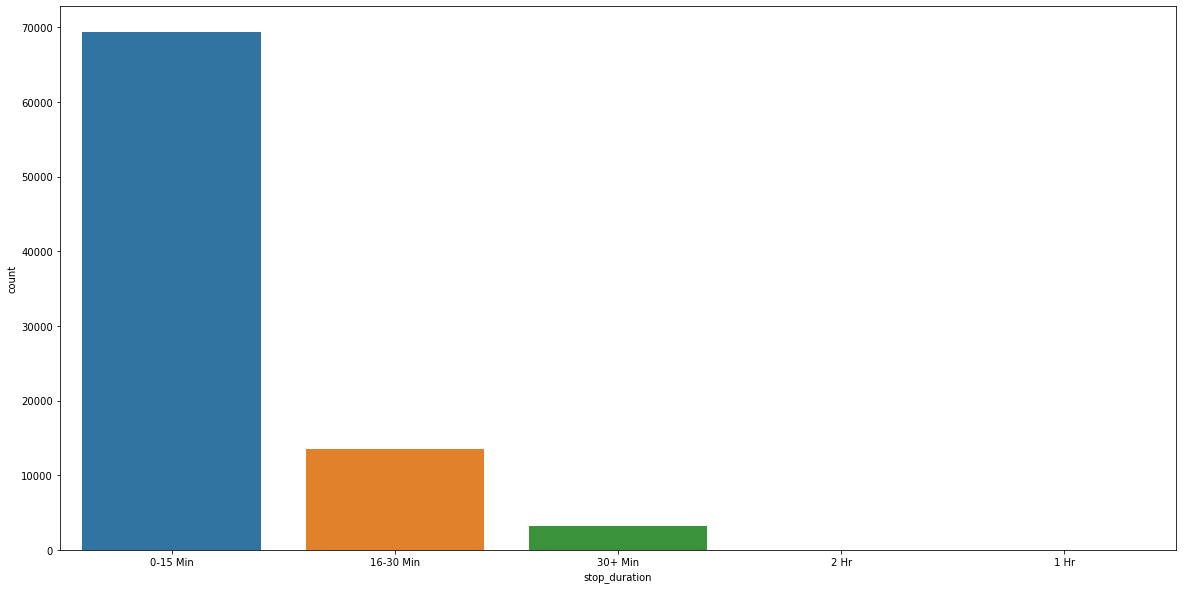

In [35]:
# Setting figure size
plt.figure(figsize=(20,10))

# Plotting shipmode
sns.countplot(cln_df['stop_duration'])
print('\033[1m','Below is the bar graph which shows the duration of the traffic stop happend.','\033[0m')
plt.show()